In [1]:
# import matplotlib
# matplotlib.use("TkAgg")  # fix for macOS
from matplotlib import pyplot as plt
import glob, os
import sys
from skimage import io, exposure
from tqdm import tqdm
import numpy as np

In [2]:
def read_tiff(file):
    im_raw = io.imread(file)
    im = im_raw[:, :, [3, 2, 1]]
    # a tiff file contains the raw channels: return [B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,B12]
    # a rgb images needs the following channels:  return [B04, B03, B02]
    # ==> index [3, 2, 1]

    im = exposure.rescale_intensity(im)
    return im, im_raw

In [3]:
path = 'fullandpartial'
search_path = os.path.join(path,"*.tiff")
n_files = len(glob.glob(search_path))
un_pix_rgb, m_pix_rgb, sd_pix_rgb = [], [], []
un_pix_raw, m_pix_raw, sd_pix_raw = [], [], []
files = []

for i, file in tqdm(enumerate(glob.glob(search_path)), total=n_files):
    files.append(file.split('/')[-1])
    
    im, im_raw = read_tiff(file)
    
    un_pix_rgb.append(len(np.unique(im)))
    m_pix_rgb.append(np.mean(im))
    sd_pix_rgb.append(np.std(im))
    
    un_pix_raw_tmp, m_pix_raw_tmp, sd_pix_raw_tmp = [], [], []
    for j in range(im_raw.shape[-1]):
        un_pix_raw_tmp.append(len(np.unique(im_raw[:,:,j])))
        m_pix_raw_tmp.append(np.mean(im_raw[:,:,j]))
        sd_pix_raw_tmp.append(np.std(im_raw[:,:,j]))
    
    un_pix_raw_tmp.append(len(np.unique(im_raw)))
    m_pix_raw_tmp.append(np.mean(im_raw))
    sd_pix_raw_tmp.append(np.std(im_raw))

    un_pix_raw.append(un_pix_raw_tmp)
    m_pix_raw.append(m_pix_raw_tmp)
    sd_pix_raw.append(sd_pix_raw_tmp)

100%|██████████| 1874/1874 [15:31<00:00,  1.99it/s]


In [4]:
not_good_name = [
    '7480244118-A_BANDS-S2-L1C.tiff', 
    '4800146949-A_BANDS-S2-L1C.tiff', 
    '5630426937-A_BANDS-S2-L1C.tiff', 
    '6360376791-A_BANDS-S2-L1C.tiff', 
    '8530247088-A_BANDS-S2-L1C.tiff', 
    '6360376993-A_BANDS-S2-L1C.tiff', 
    '6360376690-A_BANDS-S2-L1C.tiff', 
    '6170174242-A_BANDS-S2-L1C.tiff', 
    '7480087908-A_BANDS-S2-L1C.tiff', 
    '4800310334-A_BANDS-S2-L1C.tiff', 
    '4760306423-A_BANDS-S2-L1C.tiff', 
    '5351148678-A_BANDS-S2-L1C.tiff', 
    '4230298423-A_BANDS-S2-L1C.tiff', 
    '3170187746-A_BANDS-S2-L1C.tiff', 
    '2560213552-A_BANDS-S2-L1C.tiff', 
    '5010091325-A_BANDS-S2-L1C.tiff', 
    '5820143375-A_BANDS-S2-L1C.tiff', 
    '6170093309-A_BANDS-S2-L1C.tiff',
    '8530122911-A_BANDS-S2-L1C.tiff',
    '1400733146-A_BANDS-S2-L1C.tiff',
    '4020221883-A_BANDS-S2-L1C.tiff',
    '2190108840-A_BANDS-S2-L1C.tiff',
    '9260292229-A_BANDS-S2-L1C.tiff',
    '7340038496-A_BANDS-S2-L1C.tiff',
    '7340038395-A_BANDS-S2-L1C.tiff',
    '8530461906-A_BANDS-S2-L1C.tiff',
    '8410008114-A_BANDS-S2-L1C.tiff',
    '6030066735-A_BANDS-S2-L1C.tiff',
    '4760275202-A_BANDS-S2-L1C.tiff',
    '6260172054-A_BANDS-S2-L1C.tiff',
    '9260105101-A_BANDS-S2-L1C.tiff',
    '6030124935-A_BANDS-S2-L1C.tiff',
    '9160282704-A_BANDS-S2-L1C.tiff',
    '5950373454-A_BANDS-S2-L1C.tiff',
    '2631153389-A_BANDS-S2-L1C.tiff',
    '6030119275-A_BANDS-S2-L1C.tiff',
    '5950402958-A_BANDS-S2-L1C.tiff',
    '1690313714-A_BANDS-S2-L1C.tiff',
    '0710606640-A_BANDS-S2-L1C.tiff',
    '5950373959-A_BANDS-S2-L1C.tiff',
    '3170017489-A_BANDS-S2-L1C.tiff',
    '5950460754-A_BANDS-S2-L1C.tiff',
    '9110334067-A_BANDS-S2-L1C.tiff',
    '5640146842-C_BANDS-S2-L1C.tiff',
    '7610178749-A_BANDS-S2-L1C.tiff',
    '6260166091-A_BANDS-S2-L1C.tiff',
    '3170158141-A_BANDS-S2-L1C.tiff',
    '3170017388-A_BANDS-S2-L1C.tiff',
    '6030052991-A_BANDS-S2-L1C.tiff',
    '5640129361-D_BANDS-S2-L1C.tiff',
    '5950221991-A_BANDS-S2-L1C.tiff',
    '7850223538-A_BANDS-S2-L1C.tiff',
    '2630635249-A_BANDS-S2-L1C.tiff',
    '9260173001-A_BANDS-S2-L1C.tiff',
    '1690118300-A_BANDS-S2-L1C.tiff',
    '5630161704-A_BANDS-S2-L1C.tiff',
    '2631160564-B_BANDS-S2-L1C.tiff',
    '1400419716-A_BANDS-S2-L1C.tiff',
    '5350231727-A_BANDS-S2-L1C.tiff',
    '6260318463-A_BANDS-S2-L1C.tiff',
    '2630193695-A_BANDS-S2-L1C.tiff',
    '7610477833-A_BANDS-S2-L1C.tiff',
    '9260320117-A_BANDS-S2-L1C.tiff',
    '9260348409-A_BANDS-S2-L1C.tiff',
    '4030147815-A_BANDS-S2-L1C.tiff',
    '6260256021-A_BANDS-S2-L1C.tiff',
    '5630465737-A_BANDS-S2-L1C.tiff',
    '7610455807-A_BANDS-S2-L1C.tiff',
    '6260086269-A_BANDS-S2-L1C.tiff',
    '6260026655-A_BANDS-S2-L1C.tiff',
    '2900336574-B_BANDS-S2-L1C.tiff',
    '5780025185-A_BANDS-S2-L1C.tiff',
    '6260088895-A_BANDS-S2-L1C.tiff',
    '6030037130-A_BANDS-S2-L1C.tiff',
    '6260313615-A_BANDS-S2-L1C.tiff',
    '6260256122-A_BANDS-S2-L1C.tiff',
    '7610548763-A_BANDS-S2-L1C.tiff',
    '6260496396-A_BANDS-S2-L1C.tiff',
    '0610133737-A_BANDS-S2-L1C.tiff',
    '6260058785-A_BANDS-S2-L1C.tiff',
    '6200175837-A_BANDS-S2-L1C.tiff',
    '5950420338-A_BANDS-S2-L1C.tiff',
    '5630465838-A_BANDS-S2-L1C.tiff',
    '9260320420-A_BANDS-S2-L1C.tiff',
    '2630193190-A_BANDS-S2-L1C.tiff',
    '0690383453-A_BANDS-S2-L1C.tiff',
    '0690323738-A_BANDS-S2-L1C.tiff',
    '5350799175-A_BANDS-S2-L1C.tiff',
    '9260142382-A_BANDS-S2-L1C.tiff',
    '3170331226-A_BANDS-S2-L1C.tiff',
    '5640119055-A_BANDS-S2-L1C.tiff',
    '9160022218-B_BANDS-S2-L1C.tiff',
    '9160118713-B_BANDS-S2-L1C.tiff',
    '3170168144-A_BANDS-S2-L1C.tiff',
    '7460239078-A_BANDS-S2-L1C.tiff',
    '6260125372-A_BANDS-S2-L1C.tiff',
    '3150446832-A_BANDS-S2-L1C.tiff',
    '2630395072-A_BANDS-S2-L1C.tiff',
    '2631151066-A_BANDS-S2-L1C.tiff',
    '6030125238-A_BANDS-S2-L1C.tiff',
    '1400439520-A_BANDS-S2-L1C.tiff',
    '0610134141-A_BANDS-S2-L1C.tiff',
    '9260120558-A_BANDS-S2-L1C.tiff',
    '9160182468-B_BANDS-S2-L1C.tiff',
    '3170158343-A_BANDS-S2-L1C.tiff',
    '4940193428-A_BANDS-S2-L1C.tiff',
    '0610125350-A_BANDS-S2-L1C.tiff',
    '6260387272-A_BANDS-S2-L1C.tiff',
    '0710171352-A_BANDS-S2-L1C.tiff',
    '4020440842-A_BANDS-S2-L1C.tiff',
    '9160080317-A_BANDS-S2-L1C.tiff',
    '2630886237-A_BANDS-S2-L1C.tiff',
    '8490273994-B_BANDS-S2-L1C.tiff',
    '6260247937-A_BANDS-S2-L1C.tiff',
    '6030122814-A_BANDS-S2-L1C.tiff',
    '6030029955-A_BANDS-S2-L1C.tiff',
    '9160134170-A_BANDS-S2-L1C.tiff',
    '4030625539-A_BANDS-S2-L1C.tiff',
    '0690052441-B_BANDS-S2-L1C.tiff',
    '9250032154-A_BANDS-S2-L1C.tiff',
    '5070394811-G_BANDS-S2-L1C.tiff',
    '6030036928-A_BANDS-S2-L1C.tiff',
    '7460138139-A_BANDS-S2-L1C.tiff',
    '5630162108-A_BANDS-S2-L1C.tiff',
    '1690064241-A_BANDS-S2-L1C.tiff',
    '3170343956-A_BANDS-S2-L1C.tiff',
    '3150450771-A_BANDS-S2-L1C.tiff',
    '9260286468-A_BANDS-S2-L1C.tiff',
    '5630372676-A_BANDS-S2-L1C.tiff',
    '9260002744-B_BANDS-S2-L1C.tiff',
    '8340305631-A_BANDS-S2-L1C.tiff',
    '0610382301-A_BANDS-S2-L1C.tiff',
    '6260375148-A_BANDS-S2-L1C.tiff',
    '8490136780-A_BANDS-S2-L1C.tiff',
    '9160182266-B_BANDS-S2-L1C.tiff',
    '6260087077-A_BANDS-S2-L1C.tiff',
    '4030108914-A_BANDS-S2-L1C.tiff',
    '9260029723-A_BANDS-S2-L1C.tiff',
    '4940132804-A_BANDS-S2-L1C.tiff',
    '0690107813-A_BANDS-S2-L1C.tiff',
    '1690064342-A_BANDS-S2-L1C.tiff',
    '4940169681-A_BANDS-S2-L1C.tiff',
    '4760306625-A_BANDS-S2-L1C.tiff',
    '9260124093-A_BANDS-S2-L1C.tiff',
    '6030029753-A_BANDS-S2-L1C.tiff',
    '4750426668-A_BANDS-S2-L1C.tiff',
    '0610105445-A_BANDS-S2-L1C.tiff',
    '7610270089-A_BANDS-S2-L1C.tiff',
    '6260449415-A_BANDS-S2-L1C.tiff',
    '9260145921-A_BANDS-S2-L1C.tiff',
    '9250122282-B_BANDS-S2-L1C.tiff',
    '8930690572-A_BANDS-S2-L1C.tiff',
    '0840135386-A_BANDS-S2-L1C.tiff',
    '0690052441-A_BANDS-S2-L1C.tiff',
    '6360376892-A_BANDS-S2-L1C.tiff',
    '9260107323-A_BANDS-S2-L1C.tiff',
    '5780251521-A_BANDS-S2-L1C.tiff',
    '9260002744-C_BANDS-S2-L1C.tiff',
    '9250121979-A_BANDS-S2-L1C.tiff',
    '5630162007-A_BANDS-S2-L1C.tiff',
    '5950335866-A_BANDS-S2-L1C.tiff',
    '2880437127-A_BANDS-S2-L1C.tiff',
    '5340315091-A_BANDS-S2-L1C.tiff',
    '6260210854-A_BANDS-S2-L1C.tiff',
    '7610784795-A_BANDS-S2-L1C.tiff',
    '4940157052-A_BANDS-S2-L1C.tiff',
    '4020050923-A_BANDS-S2-L1C.tiff',
    '5950415890-A_BANDS-S2-L1C.tiff',
    '9250400653-B_BANDS-S2-L1C.tiff',
    '5640056512-F_BANDS-S2-L1C.tiff',
    '3170285049-A_BANDS-S2-L1C.tiff',
    '0610012081-A_BANDS-S2-L1C.tiff',
    '5820024652-A_BANDS-S2-L1C.tiff',
    '2630751144-A_BANDS-S2-L1C.tiff',
    '6260112945-A_BANDS-S2-L1C.tiff',
    '5780075204-A_BANDS-S2-L1C.tiff',
    '6030037332-A_BANDS-S2-L1C.tiff',
    '3170260700-A_BANDS-S2-L1C.tiff',
    '9260093781-A_BANDS-S2-L1C.tiff',
    '5350255167-A_BANDS-S2-L1C.tiff',
    '5630474427-A_BANDS-S2-L1C.tiff',
    '4250069346-B_BANDS-S2-L1C.tiff',
    '9260124804-A_BANDS-S2-L1C.tiff',
    '5630193531-A_BANDS-S2-L1C.tiff',
    '0690640606-A_BANDS-S2-L1C.tiff',
    '0690501065-A_BANDS-S2-L1C.tiff',
    '9260124396-A_BANDS-S2-L1C.tiff',
    '5640057017-A_BANDS-S2-L1C.tiff',
    '6030011363-A_BANDS-S2-L1C.tiff',
    '7610475409-A_BANDS-S2-L1C.tiff',
    '9160283007-A_BANDS-S2-L1C.tiff',
    '4020174801-A_BANDS-S2-L1C.tiff',
    '5950175414-C_BANDS-S2-L1C.tiff',
    '0190008751-A_BANDS-S2-L1C.tiff',
    '8340139721-B_BANDS-S2-L1C.tiff',
    '4020051327-A_BANDS-S2-L1C.tiff',
    '5780222926-A_BANDS-S2-L1C.tiff',
    '8590489647-A_BANDS-S2-L1C.tiff',
    '5980034337-A_BANDS-S2-L1C.tiff',
    '6170155650-A_BANDS-S2-L1C.tiff',
    '2190138849-B_BANDS-S2-L1C.tiff',
    '0690437310-A_BANDS-S2-L1C.tiff',
    '9260157035-A_BANDS-S2-L1C.tiff',
    '6260172660-A_BANDS-S2-L1C.tiff',
    '2630344249-B_BANDS-S2-L1C.tiff',
    '8490127585-A_BANDS-S2-L1C.tiff',
    '6260300174-A_BANDS-S2-L1C.tiff',
    '0690303530-A_BANDS-S2-L1C.tiff',
    '6030049860-A_BANDS-S2-L1C.tiff',
    '2160113309-A_BANDS-S2-L1C.tiff',
    '5950471565-A_BANDS-S2-L1C.tiff',
    '8340235711-A_BANDS-S2-L1C.tiff',
    '4020045768-A_BANDS-S2-L1C.tiff',
    '6260313413-A_BANDS-S2-L1C.tiff',
    '8590182378-A_BANDS-S2-L1C.tiff',
    '9120137030-A_BANDS-S2-L1C.tiff',
    '0710653625-A_BANDS-S2-L1C.tiff',
    '5820024753-A_BANDS-S2-L1C.tiff',
    '9160022117-A_BANDS-S2-L1C.tiff',
    '4020403052-A_BANDS-S2-L1C.tiff',
    '9260111565-A_BANDS-S2-L1C.tiff',
    '2170376717-A_BANDS-S2-L1C.tiff',
    '7080299475-A_BANDS-S2-L1C.tiff',
    '9120701953-A_BANDS-S2-L1C.tiff',
    '0610067150-A_BANDS-S2-L1C.tiff',
    '9260172593-A_BANDS-S2-L1C.tiff',
    '8590251187-A_BANDS-S2-L1C.tiff',
    '7610455605-A_BANDS-S2-L1C.tiff',
    '6360154402-A_BANDS-S2-L1C.tiff',
    '4020440640-A_BANDS-S2-L1C.tiff',
    '3170316371-A_BANDS-S2-L1C.tiff',
    '4940403794-A_BANDS-S2-L1C.tiff',
    '3170251404-A_BANDS-S2-L1C.tiff',
    '5640038728-A_BANDS-S2-L1C.tiff',
    '4940132396-B_BANDS-S2-L1C.tiff',
    '6170026823-A_BANDS-S2-L1C.tiff',
    '5950473989-A_BANDS-S2-L1C.tiff',
    '8340328465-A_BANDS-S2-L1C.tiff',
    '5630218385-A_BANDS-S2-L1C.tiff',
    '7610614037-C_BANDS-S2-L1C.tiff',
    '9260359220-A_BANDS-S2-L1C.tiff',
    '4230231937-A_BANDS-S2-L1C.tiff',
    '0690450949-A_BANDS-S2-L1C.tiff',
    '6260119413-A_BANDS-S2-L1C.tiff',
    '0710227633-A_BANDS-S2-L1C.tiff',
    '8890013321-B_BANDS-S2-L1C.tiff',
    '3170420445-A_BANDS-S2-L1C.tiff',
    '2750170268-A_BANDS-S2-L1C.tiff',
    '6310086133-A_BANDS-S2-L1C.tiff',
    '0710700004-A_BANDS-S2-L1C.tiff',
    '6170073101-A_BANDS-S2-L1C.tiff',
    '4250307705-A_BANDS-S2-L1C.tiff',
    '5990070100-A_BANDS-S2-L1C.tiff',
    '7650029379-A_BANDS-S2-L1C.tiff',
    '9260078728-A_BANDS-S2-L1C.tiff',
    '8630185784-A_BANDS-S2-L1C.tiff',
    '3170087918-A_BANDS-S2-L1C.tiff',
    '3170212402-A_BANDS-S2-L1C.tiff',
    '3170253222-A_BANDS-S2-L1C.tiff',
    '6260017359-A_BANDS-S2-L1C.tiff',
    '3170060636-A_BANDS-S2-L1C.tiff',
    '5820095077-B_BANDS-S2-L1C.tiff',
    '4750366852-A_BANDS-S2-L1C.tiff',
    '8930369058-B_BANDS-S2-L1C.tiff',
    '8590059009-A_BANDS-S2-L1C.tiff',
    '8930193044-A_BANDS-S2-L1C.tiff',
    '3170118432-A_BANDS-S2-L1C.tiff',
    '5590336130-A_BANDS-S2-L1C.tiff',
    '4940132396-A_BANDS-S2-L1C.tiff',
    '4750335631-A_BANDS-S2-L1C.tiff',
    '8890247939-A_BANDS-S2-L1C.tiff',
    '5640145630-D_BANDS-S2-L1C.tiff',
    '7460132681-A_BANDS-S2-L1C.tiff',
    '5640145630-B_BANDS-S2-L1C.tiff',
    '8490274095-B_BANDS-S2-L1C.tiff',
    '8590010711-A_BANDS-S2-L1C.tiff',
    '0690052239-B_BANDS-S2-L1C.tiff',
    '4750367458-A_BANDS-S2-L1C.tiff',
    '4230266087-A_BANDS-S2-L1C.tiff',
    '4760075138-A_BANDS-S2-L1C.tiff',
    '5590037551-A_BANDS-S2-L1C.tiff',
    '0610356332-A_BANDS-S2-L1C.tiff',
    '8930910541-A_BANDS-S2-L1C.tiff',
    '8930781310-A_BANDS-S2-L1C.tiff',
    '8630031796-A_BANDS-S2-L1C.tiff',
    '7611017595-A_BANDS-S2-L1C.tiff',
    '5820024854-A_BANDS-S2-L1C.tiff',
    '6360173903-D_BANDS-S2-L1C.tiff',
    '5351239416-A_BANDS-S2-L1C.tiff',
    '9160124369-A_BANDS-S2-L1C.tiff',
    '4360200823-A_BANDS-S2-L1C.tiff',
    '3170255444-A_BANDS-S2-L1C.tiff',
    '9160035049-A_BANDS-S2-L1C.tiff',
    '0610368658-A_BANDS-S2-L1C.tiff',
    '6170067138-A_BANDS-S2-L1C.tiff',
    '4400050342-A_BANDS-S2-L1C.tiff',
    '3170439542-A_BANDS-S2-L1C.tiff',
    '4760072916-A_BANDS-S2-L1C.tiff',
    '6260317756-A_BANDS-S2-L1C.tiff',
    '5630200201-A_BANDS-S2-L1C.tiff',
    '0710227734-A_BANDS-S2-L1C.tiff',
    '5040054928-A_BANDS-S2-L1C.tiff',
    '1030245080-A_BANDS-S2-L1C.tiff',
    '4750391407-A_BANDS-S2-L1C.tiff',
    '4940436433-A_BANDS-S2-L1C.tiff',
    '5630313567-A_BANDS-S2-L1C.tiff',
    '8590038393-A_BANDS-S2-L1C.tiff',
    '9770269022-A_BANDS-S2-L1C.tiff',
    '4940403895-A_BANDS-S2-L1C.tiff',
    '3170255949-A_BANDS-S2-L1C.tiff',
    '5030434952-A_BANDS-S2-L1C.tiff',
    '8590068305-A_BANDS-S2-L1C.tiff',
    '6820067269-A_BANDS-S2-L1C.tiff',
    '2631153288-A_BANDS-S2-L1C.tiff',
    '4020051226-A_BANDS-S2-L1C.tiff',
    '0610125552-A_BANDS-S2-L1C.tiff',
    '2520101527-A_BANDS-S2-L1C.tiff',
    '5410189649-A_BANDS-S2-L1C.tiff',
    '8340194483-A_BANDS-S2-L1C.tiff',
    '5030298647-A_BANDS-S2-L1C.tiff',
    '9440485994-A_BANDS-S2-L1C.tiff',
    '9260198663-B_BANDS-S2-L1C.tiff',
    '4750686750-A_BANDS-S2-L1C.tiff',
    '4760431109-A_BANDS-S2-L1C.tiff',
    '9260298895-A_BANDS-S2-L1C.tiff',
    '5450954103-A_BANDS-S2-L1C.tiff',
    '5351155449-A_BANDS-S2-L1C.tiff',
    '5630265774-A_BANDS-S2-L1C.tiff',
    '5630274666-A_BANDS-S2-L1C.tiff',
    '8590469843-A_BANDS-S2-L1C.tiff',
    '1690364032-A_BANDS-S2-L1C.tiff',
    '1030068157-A_BANDS-S2-L1C.tiff',
    '4400050645-A_BANDS-S2-L1C.tiff',
    '5640145630-A_BANDS-S2-L1C.tiff',
    '2440085318-A_BANDS-S2-L1C.tiff',
    '6260497006-A_BANDS-S2-L1C.tiff',
    '0710543790-A_BANDS-S2-L1C.tiff',
    '7610274638-A_BANDS-S2-L1C.tiff',
    '5380053668-A_BANDS-S2-L1C.tiff',
    '7080568651-A_BANDS-S2-L1C.tiff',
    '5990236919-A_BANDS-S2-L1C.tiff',
    '0610013293-A_BANDS-S2-L1C.tiff',
    '4360158282-B_BANDS-S2-L1C.tiff',
    '5630265976-A_BANDS-S2-L1C.tiff',
    '5980034135-A_BANDS-S2-L1C.tiff',
    '7611004057-A_BANDS-S2-L1C.tiff',
    '8590038595-A_BANDS-S2-L1C.tiff',
    '7080654638-A_BANDS-S2-L1C.tiff',
    '7610678196-A_BANDS-S2-L1C.tiff',
    '5780147952-A_BANDS-S2-L1C.tiff',
    '0100359735-A_BANDS-S2-L1C.tiff',
    '0050337946-A_BANDS-S2-L1C.tiff',
    '2080265030-A_BANDS-S2-L1C.tiff',
    '0100360543-A_BANDS-S2-L1C.tiff',
    '7460623543-A_BANDS-S2-L1C.tiff',
    '3170356484-A_BANDS-S2-L1C.tiff',
    '1030061588-A_BANDS-S2-L1C.tiff',
    '9810090047-A_BANDS-S2-L1C.tiff',
    '5380103582-A_BANDS-S2-L1C.tiff',
    '4800081675-A_BANDS-S2-L1C.tiff',
    '5990431020-A_BANDS-S2-L1C.tiff',
    '0100093185-A_BANDS-S2-L1C.tiff',
    '8930313181-A_BANDS-S2-L1C.tiff',
    '7610707603-A_BANDS-S2-L1C.tiff',
    '5950446812-A_BANDS-S2-L1C.tiff',
    '7370075154-A_BANDS-S2-L1C.tiff',
    '7470031028-A_BANDS-S2-L1C.tiff',
    '5380250803-A_BANDS-S2-L1C.tiff',
    '3170167336-A_BANDS-S2-L1C.tiff',
    '2190063067-A_BANDS-S2-L1C.tiff',
    '0610087560-A_BANDS-S2-L1C.tiff',
    '7610695273-A_BANDS-S2-L1C.tiff',
    '0100784919-A_BANDS-S2-L1C.tiff',
    '4750372613-A_BANDS-S2-L1C.tiff',
    '9260369021-A_BANDS-S2-L1C.tiff',
    '0690614839-A_BANDS-S2-L1C.tiff',
    '7080484280-B_BANDS-S2-L1C.tiff',
    '6030136655-A_BANDS-S2-L1C.tiff',
    '5820025763-A_BANDS-S2-L1C.tiff',
    '4250260215-A_BANDS-S2-L1C.tiff',
    '8590009802-B_BANDS-S2-L1C.tiff',
    '4230134230-A_BANDS-S2-L1C.tiff',
    '6780107212-A_BANDS-S2-L1C.tiff',
    '7470013042-A_BANDS-S2-L1C.tiff',
    '0950164914-A_BANDS-S2-L1C.tiff',
    '9260309912-A_BANDS-S2-L1C.tiff',
    '8570312536-A_BANDS-S2-L1C.tiff',
    '4940337918-A_BANDS-S2-L1C.tiff',
    '4000311726-A_BANDS-S2-L1C.tiff',
    '4800075009-A_BANDS-S2-L1C.tiff',
    '1450036832-A_BANDS-S2-L1C.tiff',
    '5410189447-A_BANDS-S2-L1C.tiff',
    '8931039469-A_BANDS-S2-L1C.tiff',
    '0950193408-A_BANDS-S2-L1C.tiff',
    '2190041243-A_BANDS-S2-L1C.tiff',
    '0100656896-B_BANDS-S2-L1C.tiff',
    '0610332888-A_BANDS-S2-L1C.tiff',
    '0610036737-A_BANDS-S2-L1C.tiff',
    '7610612219-A_BANDS-S2-L1C.tiff',
    '2560017532-A_BANDS-S2-L1C.tiff',
    '4800286082-A_BANDS-S2-L1C.tiff',
    '5820116093-A_BANDS-S2-L1C.tiff',
    '5380067008-A_BANDS-S2-L1C.tiff',
    '9440433959-A_BANDS-S2-L1C.tiff',
    '5630470282-A_BANDS-S2-L1C.tiff',
    '4760258024-A_BANDS-S2-L1C.tiff',
    '2520244502-A_BANDS-S2-L1C.tiff',
    '7460639913-A_BANDS-S2-L1C.tiff',
    '4750132840-A_BANDS-S2-L1C.tiff',
    '4800111583-A_BANDS-S2-L1C.tiff',
    '4750489922-A_BANDS-S2-L1C.tiff',
    '9440433555-A_BANDS-S2-L1C.tiff',
    '3080188217-C_BANDS-S2-L1C.tiff',
    '6260312096-A_BANDS-S2-L1C.tiff',
    '5820050217-A_BANDS-S2-L1C.tiff',
    '9440738295-A_BANDS-S2-L1C.tiff',
    '9440631292-A_BANDS-S2-L1C.tiff',
    '4230036018-D_BANDS-S2-L1C.tiff',
    '5590207202-A_BANDS-S2-L1C.tiff',
    '8530115837-A_BANDS-S2-L1C.tiff',
    '5820064462-A_BANDS-S2-L1C.tiff',
    '4360065831-A_BANDS-S2-L1C.tiff',
    '4800001348-A_BANDS-S2-L1C.tiff',
    '7610613532-A_BANDS-S2-L1C.tiff',
    '3080027054-A_BANDS-S2-L1C.tiff',
    '4230036624-A_BANDS-S2-L1C.tiff',
    '0090440069-A_BANDS-S2-L1C.tiff',
    '4000421759-A_BANDS-S2-L1C.tiff',
    '0100372061-B_BANDS-S2-L1C.tiff',
    '4250353272-A_BANDS-S2-L1C.tiff',
    '5410402645-A_BANDS-S2-L1C.tiff',
    '5820096794-A_BANDS-S2-L1C.tiff',
    '7480108823-A_BANDS-S2-L1C.tiff',
    '5380102168-A_BANDS-S2-L1C.tiff',
    '2180155226-A_BANDS-S2-L1C.tiff',
    '0050592873-A_BANDS-S2-L1C.tiff',
    '1030186173-A_BANDS-S2-L1C.tiff',
    '2190117126-A_BANDS-S2-L1C.tiff',
    '5590086354-A_BANDS-S2-L1C.tiff',
    '8340309671-A_BANDS-S2-L1C.tiff',
    '2710346011-A_BANDS-S2-L1C.tiff',
    '8931002184-A_BANDS-S2-L1C.tiff',
    '4940084506-B_BANDS-S2-L1C.tiff',
    '5820063856-A_BANDS-S2-L1C.tiff',
    '5820146611-A_BANDS-S2-L1C.tiff',
    '9260360432-A_BANDS-S2-L1C.tiff',
    '3080041404-A_BANDS-S2-L1C.tiff',
    '5590207707-A_BANDS-S2-L1C.tiff',
    '4750368872-B_BANDS-S2-L1C.tiff',
    '0950164813-A_BANDS-S2-L1C.tiff',
    '5380011535-A_BANDS-S2-L1C.tiff',
    '7480244017-A_BANDS-S2-L1C.tiff',
    '5990902781-A_BANDS-S2-L1C.tiff',
    '5450128791-A_BANDS-S2-L1C.tiff',
    '9060048055-A_BANDS-S2-L1C.tiff',
    '5590324915-A_BANDS-S2-L1C.tiff',
    '2080716482-A_BANDS-S2-L1C.tiff',
    '0050054626-A_BANDS-S2-L1C.tiff',
    '0100092680-A_BANDS-S2-L1C.tiff',
    '5820100434-A_BANDS-S2-L1C.tiff',
    '0950173200-A_BANDS-S2-L1C.tiff',
    '3170152986-A_BANDS-S2-L1C.tiff',
    '4230232442-A_BANDS-S2-L1C.tiff',
    '2190022651-A_BANDS-S2-L1C.tiff',
    '4810151588-D_BANDS-S2-L1C.tiff',
    '2710469279-A_BANDS-S2-L1C.tiff',
    '2710345910-A_BANDS-S2-L1C.tiff',
    '0090168469-A_BANDS-S2-L1C.tiff',
    '4750391609-A_BANDS-S2-L1C.tiff',
    '9120168150-A_BANDS-S2-L1C.tiff',
    '0610404428-A_BANDS-S2-L1C.tiff',
    '2080012426-A_BANDS-S2-L1C.tiff',
    '5630094511-A_BANDS-S2-L1C.tiff',
    '2710305187-A_BANDS-S2-L1C.tiff',
    '4250379746-A_BANDS-S2-L1C.tiff',
    '9440387277-A_BANDS-S2-L1C.tiff',
    '0950059426-A_BANDS-S2-L1C.tiff',
    '9440368483-A_BANDS-S2-L1C.tiff',
    '5990320781-A_BANDS-S2-L1C.tiff',
    '5630274060-A_BANDS-S2-L1C.tiff',
    '4420014962-A_BANDS-S2-L1C.tiff',
    '5820065169-A_BANDS-S2-L1C.tiff',
    '5630193026-B_BANDS-S2-L1C.tiff',
    '0090140884-A_BANDS-S2-L1C.tiff',
    '4020051529-A_BANDS-S2-L1C.tiff',
    '2190122479-A_BANDS-S2-L1C.tiff',
    '6190485436-A_BANDS-S2-L1C.tiff',
    '5590300663-A_BANDS-S2-L1C.tiff',
    '5380118437-A_BANDS-S2-L1C.tiff',
    '4800030246-A_BANDS-S2-L1C.tiff',
    '2710348536-A_BANDS-S2-L1C.tiff',
    '9120154309-A_BANDS-S2-L1C.tiff',
    '9810189269-A_BANDS-S2-L1C.tiff',
    '6250417187-B_BANDS-S2-L1C.tiff',
    '5590010875-A_BANDS-S2-L1C.tiff',
    '4800030145-A_BANDS-S2-L1C.tiff',
    '2080152266-A_BANDS-S2-L1C.tiff',
    '2330899387-A_BANDS-S2-L1C.tiff',
    '3080041303-A_BANDS-S2-L1C.tiff',
    '4800114617-A_BANDS-S2-L1C.tiff',
    '6360111659-A_BANDS-S2-L1C.tiff',
    '7610858153-A_BANDS-S2-L1C.tiff',
    '5670065076-A_BANDS-S2-L1C.tiff',
    '4020221984-A_BANDS-S2-L1C.tiff',
    '3080087476-A_BANDS-S2-L1C.tiff',
    '2170430873-A_BANDS-S2-L1C.tiff',
    '7470174306-A_BANDS-S2-L1C.tiff',
    '9810192707-A_BANDS-S2-L1C.tiff',
    '5820124076-A_BANDS-S2-L1C.tiff',
    '4250330842-A_BANDS-S2-L1C.tiff',
    '8630005629-A_BANDS-S2-L1C.tiff',
    '2840189504-A_BANDS-S2-L1C.tiff',
    '2190095201-A_BANDS-S2-L1C.tiff',
    '8340333115-A_BANDS-S2-L1C.tiff',
    '2440009031-A_BANDS-S2-L1C.tiff',
    '6360111962-A_BANDS-S2-L1C.tiff',
    '0690341017-A_BANDS-S2-L1C.tiff',
    '4250171501-A_BANDS-S2-L1C.tiff',
    '5590401808-A_BANDS-S2-L1C.tiff',
    '2190160067-A_BANDS-S2-L1C.tiff',
    '6250416076-A_BANDS-S2-L1C.tiff',
    '8590501165-A_BANDS-S2-L1C.tiff',
    '2190041344-A_BANDS-S2-L1C.tiff',
    '8930024306-A_BANDS-S2-L1C.tiff',
    '6360301215-A_BANDS-S2-L1C.tiff',
    '5410189851-A_BANDS-S2-L1C.tiff',
    '2140587310-A_BANDS-S2-L1C.tiff',
    '4800075211-A_BANDS-S2-L1C.tiff',
    '5820149742-A_BANDS-S2-L1C.tiff',
    '4230265279-A_BANDS-S2-L1C.tiff',
    '5820212689-A_BANDS-S2-L1C.tiff',
    '8931033611-A_BANDS-S2-L1C.tiff',
    '2080753565-B_BANDS-S2-L1C.tiff',
    '4800024384-A_BANDS-S2-L1C.tiff',
    '8530129678-A_BANDS-S2-L1C.tiff',
    '5590386751-A_BANDS-S2-L1C.tiff',
    '6250415773-B_BANDS-S2-L1C.tiff',
    '4900040074-C_BANDS-S2-L1C.tiff',
    '5590386953-B_BANDS-S2-L1C.tiff',
    '9060013396-A_BANDS-S2-L1C.tiff',
    '9440058487-A_BANDS-S2-L1C.tiff',
    '5870137983-A_BANDS-S2-L1C.tiff',
    '9120529171-A_BANDS-S2-L1C.tiff',
    '9440789324-A_BANDS-S2-L1C.tiff',
    '4800259410-A_BANDS-S2-L1C.tiff',
    '4230092804-A_BANDS-S2-L1C.tiff',
    '2880355786-A_BANDS-S2-L1C.tiff',
    '8930912763-A_BANDS-S2-L1C.tiff',
    '6250415874-A_BANDS-S2-L1C.tiff',
    '2710483831-B_BANDS-S2-L1C.tiff',
    '4750669875-A_BANDS-S2-L1C.tiff',
    '8931033510-A_BANDS-S2-L1C.tiff',
    '3080049181-A_BANDS-S2-L1C.tiff',
    '7080597448-A_BANDS-S2-L1C.tiff',
    '9770511118-A_BANDS-S2-L1C.tiff',
    '9260345173-A_BANDS-S2-L1C.tiff',
    '2170272441-C_BANDS-S2-L1C.tiff'
]
not_good_i = []
for file_name in not_good_name:
    not_good_i.append(files.index(file_name))

In [5]:
good_name = [
    '4360073006-A_BANDS-S2-L1C.tiff',
    '8590010105-A_BANDS-S2-L1C.tiff',
    '6260086370-A_BANDS-S2-L1C.tiff',
    '9120134303-A_BANDS-S2-L1C.tiff',
    '7610614845-A_BANDS-S2-L1C.tiff',
    '7610625454-A_BANDS-S2-L1C.tiff',
    '1030222751-A_BANDS-S2-L1C.tiff',
    '0190145460-A_BANDS-S2-L1C.tiff',
    '4940020444-A_BANDS-S2-L1C.tiff',
    '3170382958-A_BANDS-S2-L1C.tiff',
    '5040054827-A_BANDS-S2-L1C.tiff',
    '7460641226-A_BANDS-S2-L1C.tiff',
    '7080447100-A_BANDS-S2-L1C.tiff',
    '6170051778-A_BANDS-S2-L1C.tiff',
    '7460640014-A_BANDS-S2-L1C.tiff',
    '4940156951-A_BANDS-S2-L1C.tiff'
]
good_i = []
for file_name in good_name:
    good_i.append(files.index(file_name))

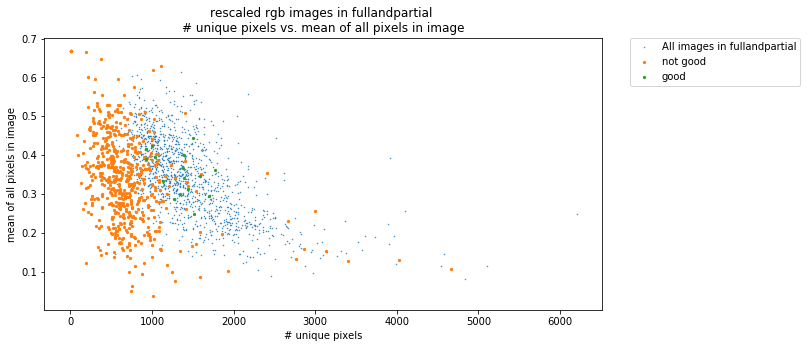

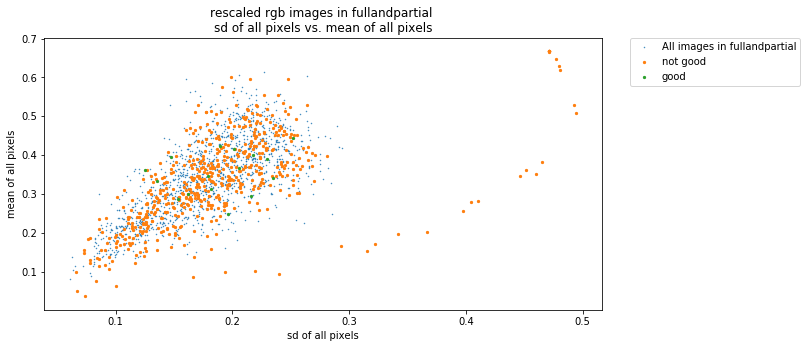

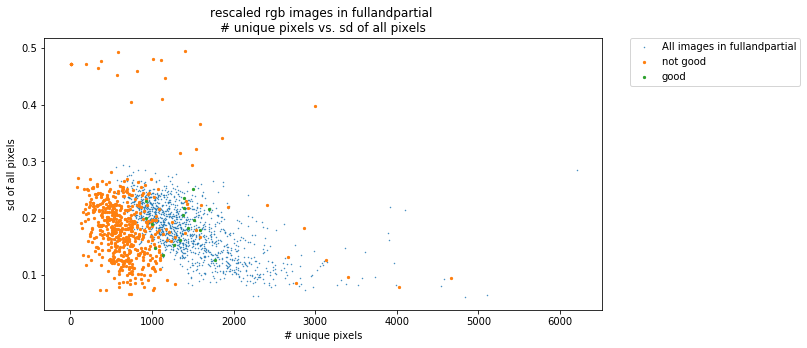

In [51]:
# plot rgb distributions
pix_values_rgb = [[un_pix_rgb, m_pix_rgb],
                  [sd_pix_rgb, m_pix_rgb],
                  [un_pix_rgb, sd_pix_rgb]
                 ]
xlabels = ['# unique pixels', 'sd of all pixels', '# unique pixels']
ylabels = ['mean of all pixels in image', 'mean of all pixels', 'sd of all pixels']
subtitles = [
    xlabels[0] + ' vs. ' + ylabels[0],
    xlabels[1] + ' vs. ' + ylabels[1],
    xlabels[2] + ' vs. ' + ylabels[2]
]

for j in range(3):
    plt.figure(figsize=(10,5))
    plt.scatter(pix_values_rgb[j][0],pix_values_rgb[j][1], s=0.2, label=f'All images in {path}')
    plt.scatter([pix_values_rgb[j][0][i] for i in not_good_i],[pix_values_rgb[j][1][i] for i in not_good_i], s=5, label='not good')
    plt.scatter([pix_values_rgb[j][0][i] for i in good_i],[pix_values_rgb[j][1][i] for i in good_i], s=5, label='good')
    plt.xlabel(xlabels[j])
    plt.ylabel(ylabels[j])
    plt.title(f'rescaled rgb images in {path} \n' + subtitles[j])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(path + '_rbg ' + subtitles[j] + '.png', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close('all');

----------------------------------------------
channel 0:


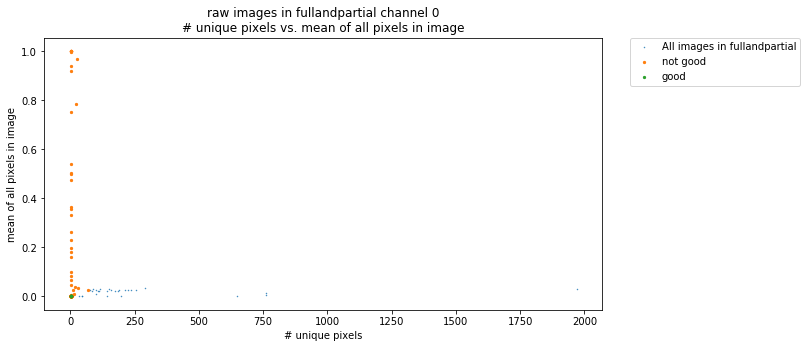

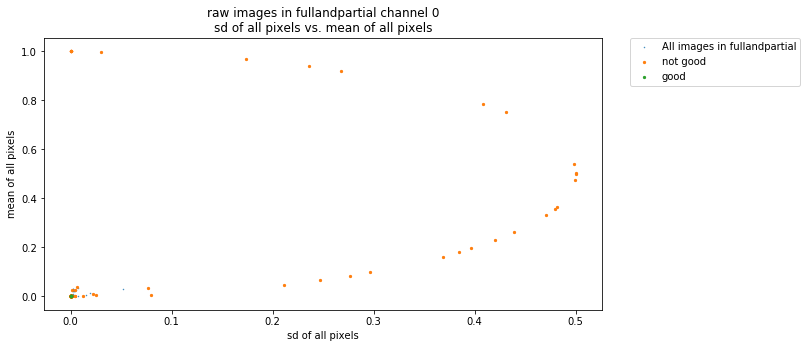

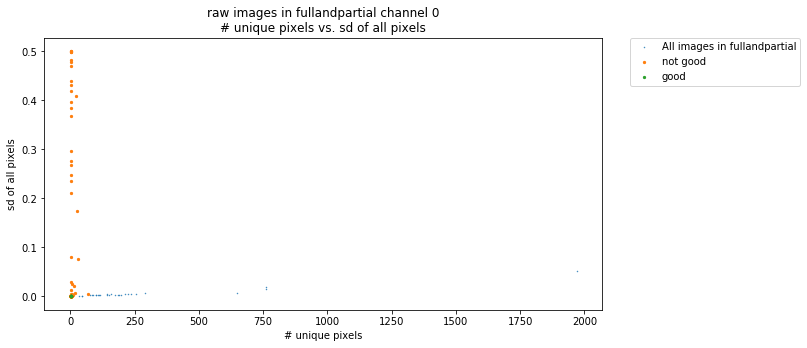

----------------------------------------------
channel 1:


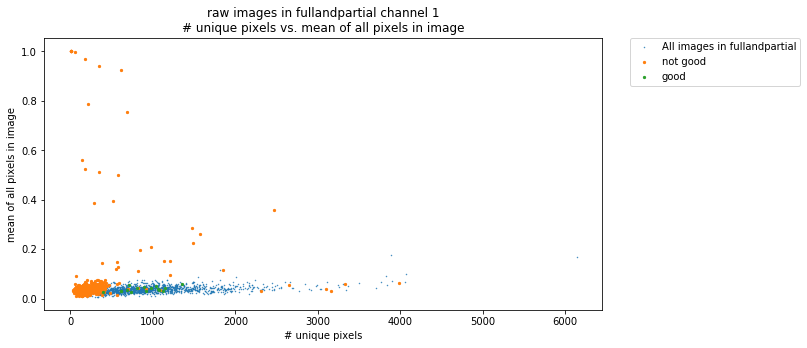

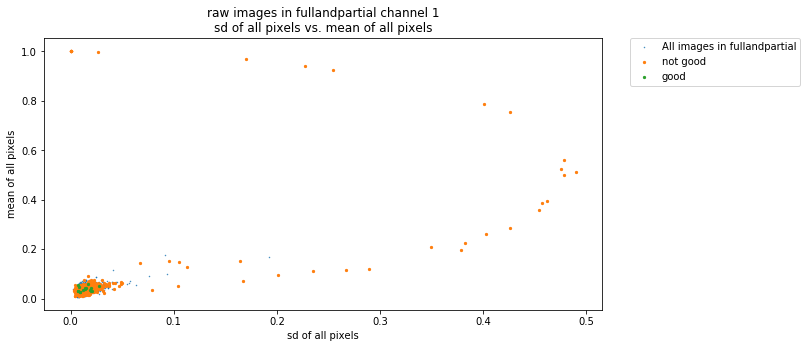

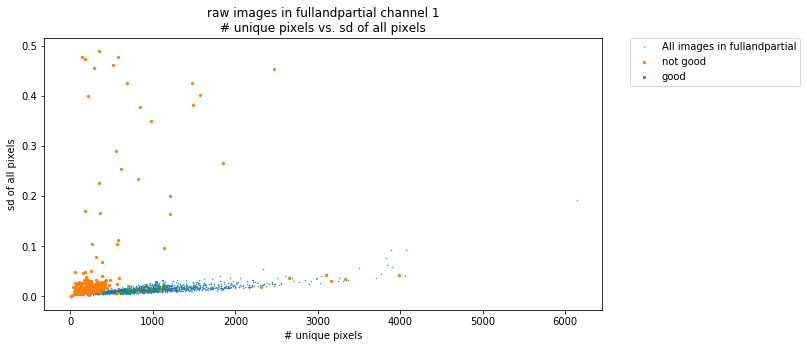

----------------------------------------------
channel 2:


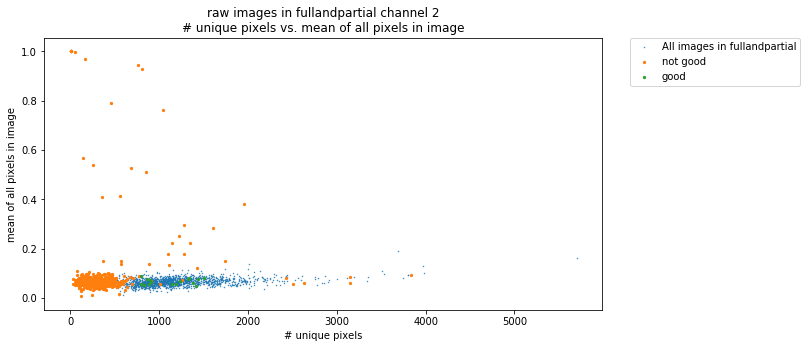

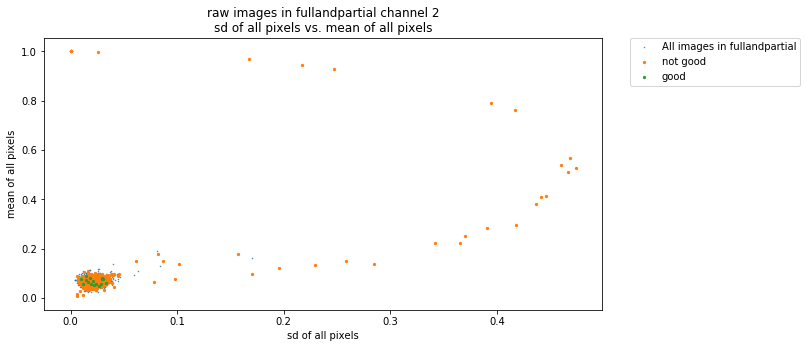

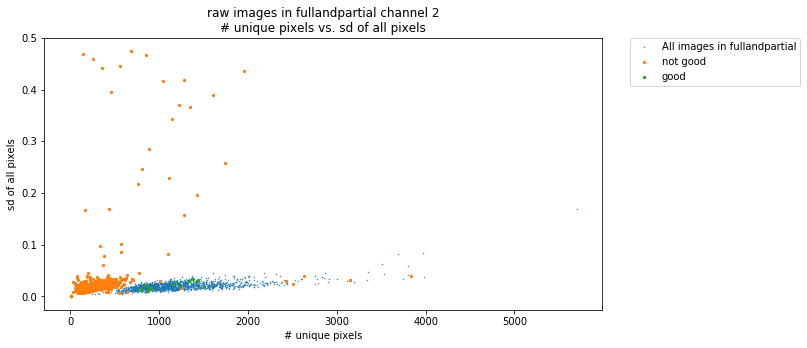

----------------------------------------------
channel 3:


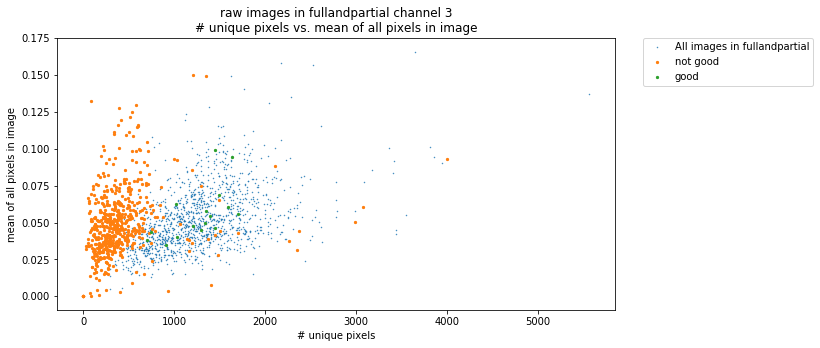

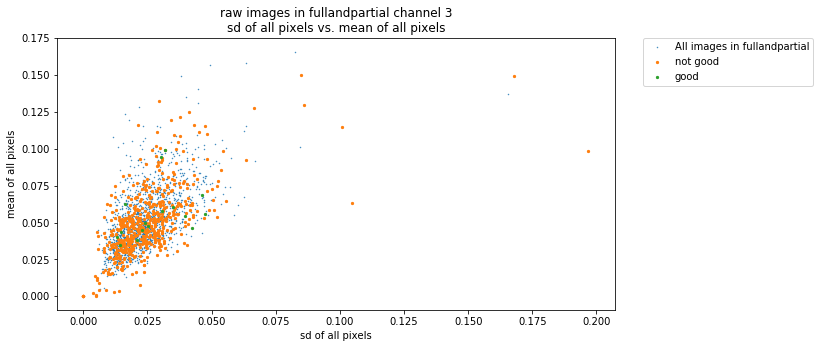

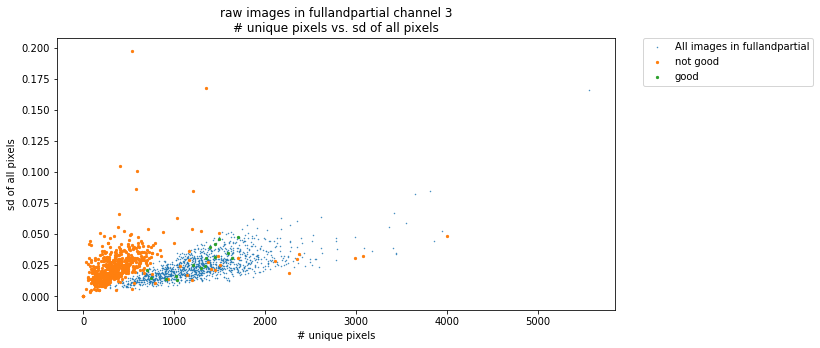

----------------------------------------------
channel 4:


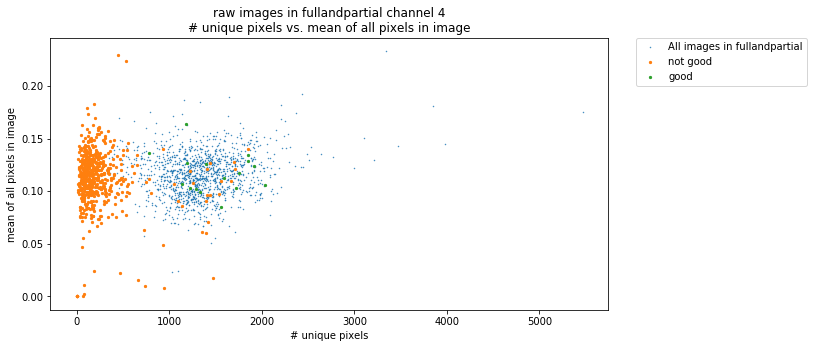

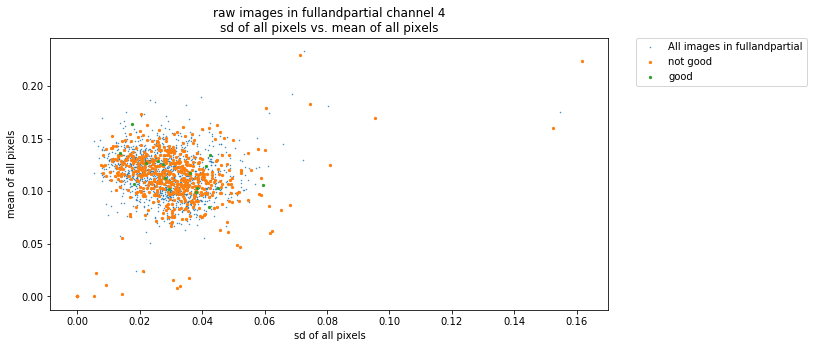

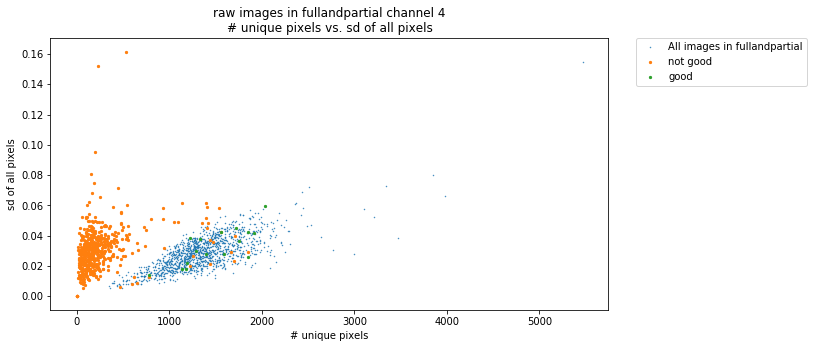

----------------------------------------------
channel 5:


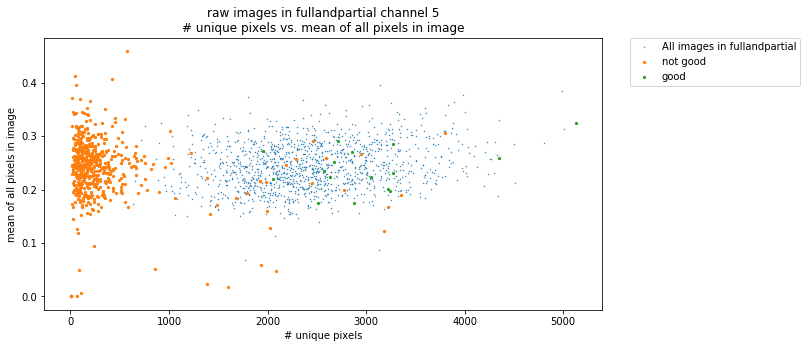

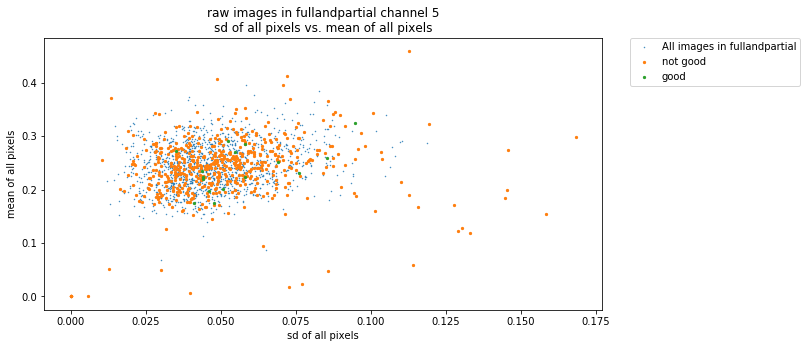

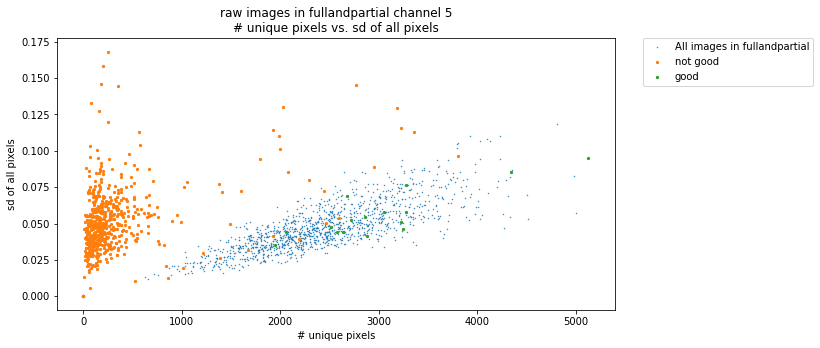

----------------------------------------------
channel 6:


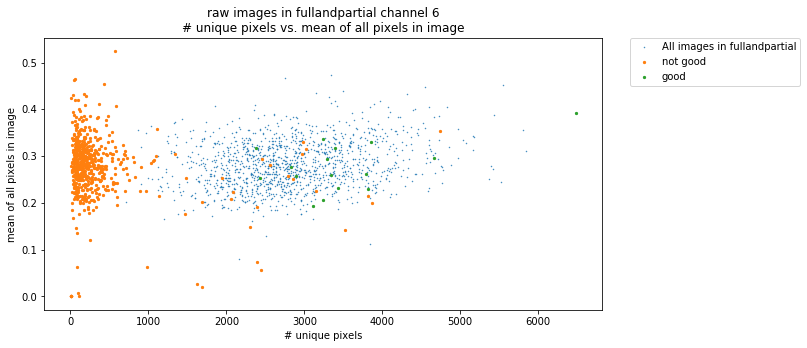

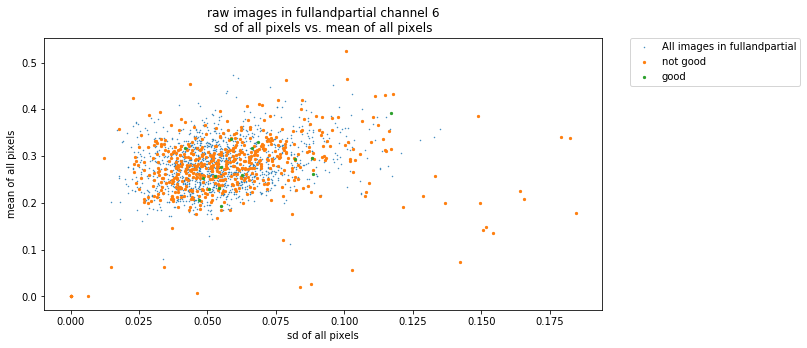

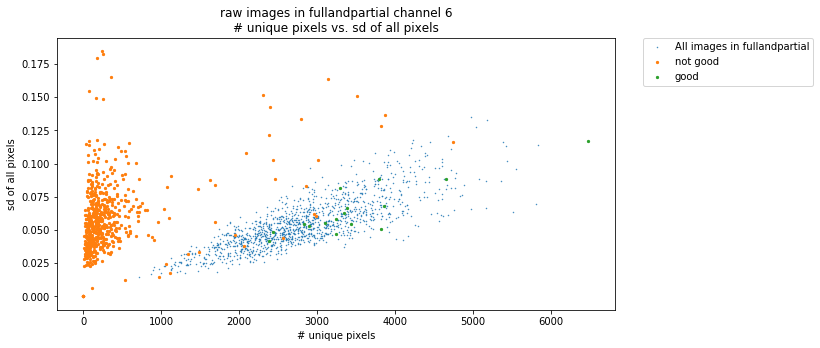

----------------------------------------------
channel 7:


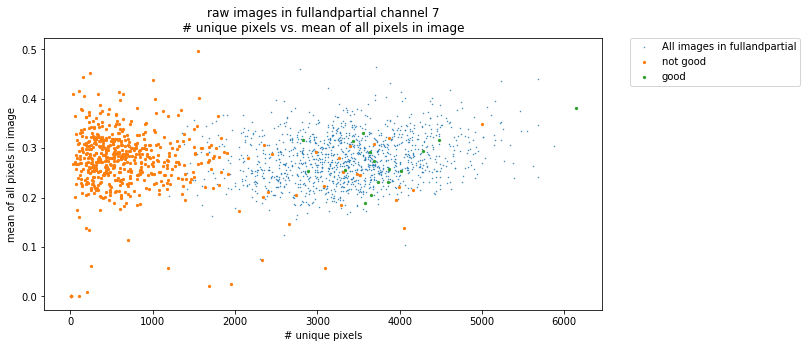

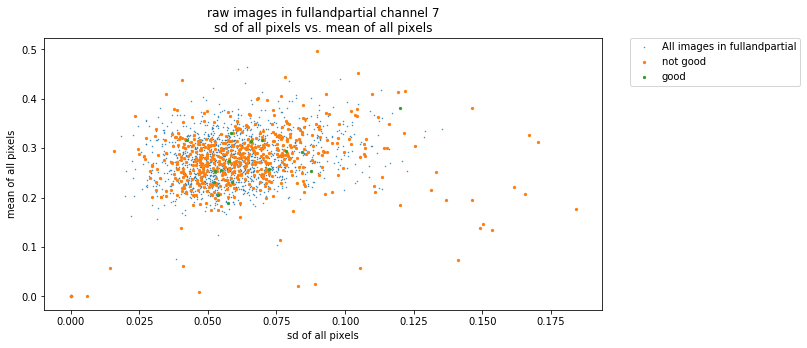

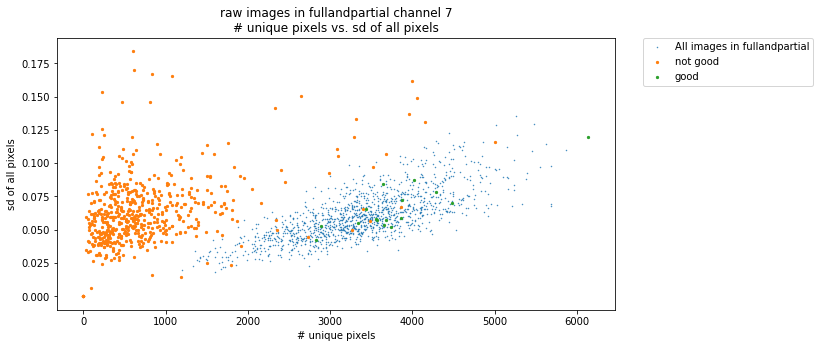

----------------------------------------------
channel 8:


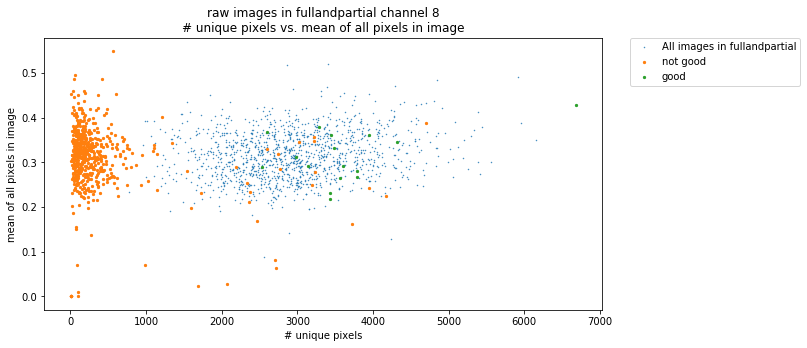

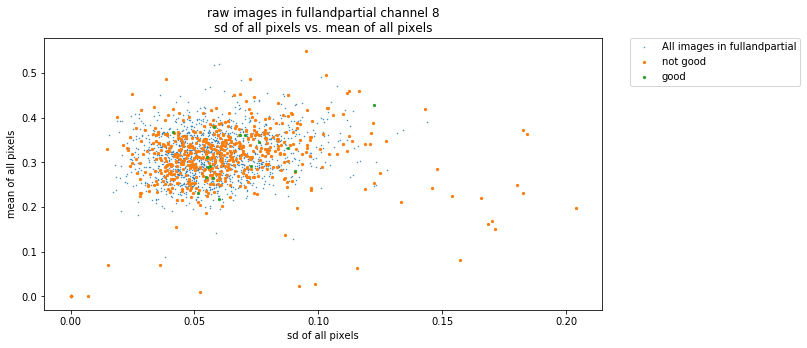

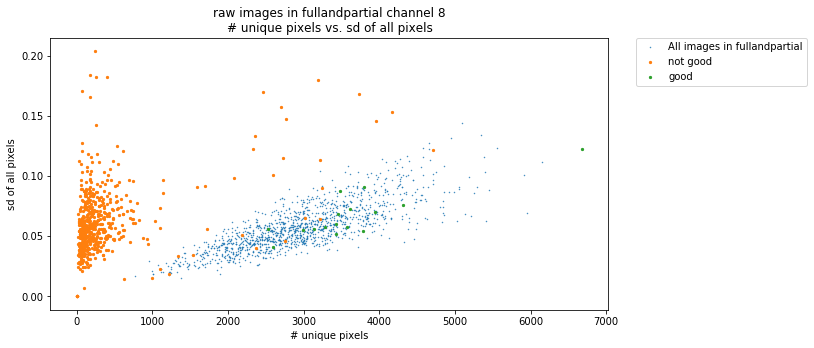

----------------------------------------------
channel 9:


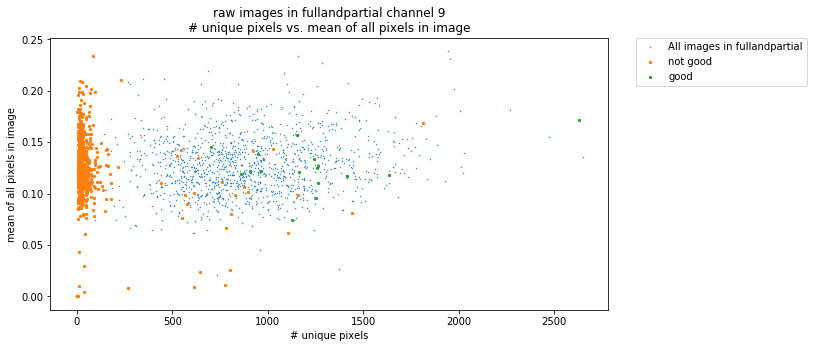

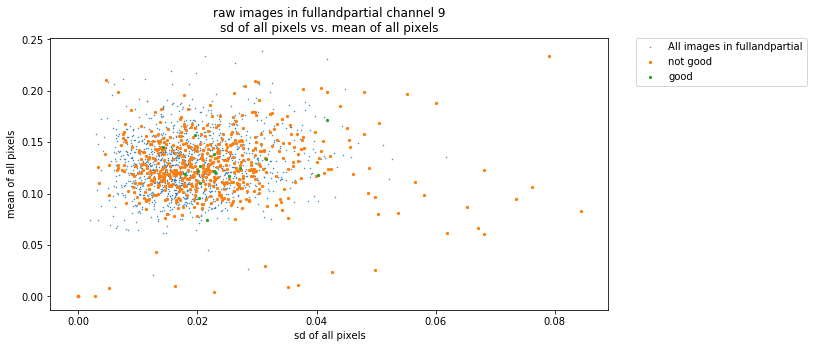

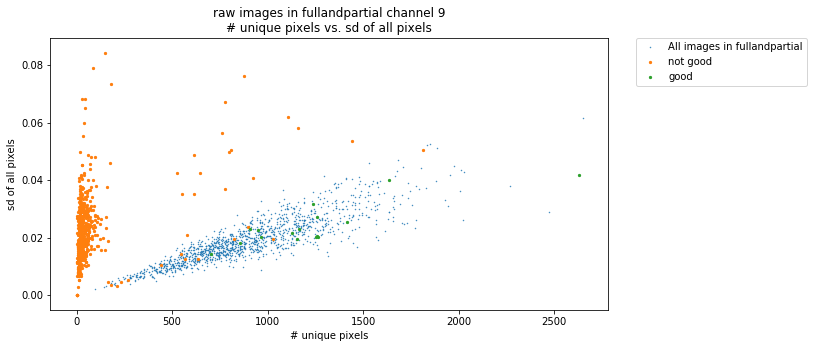

----------------------------------------------
channel 10:


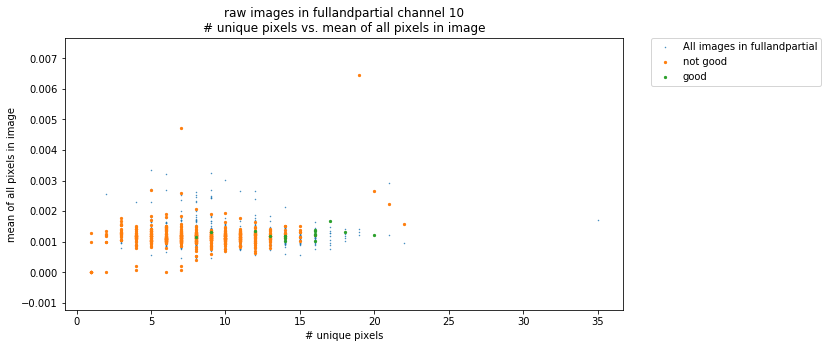

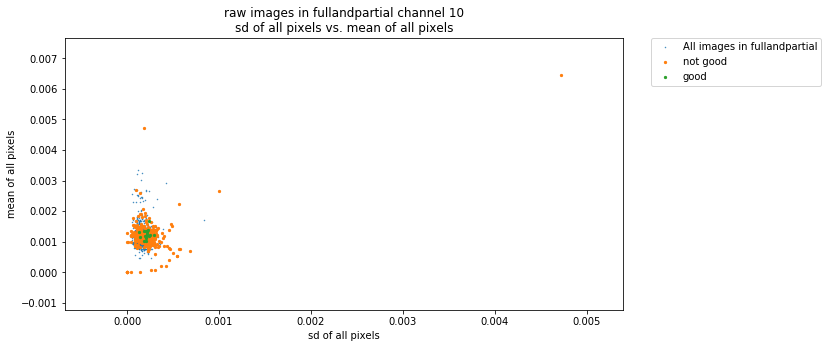

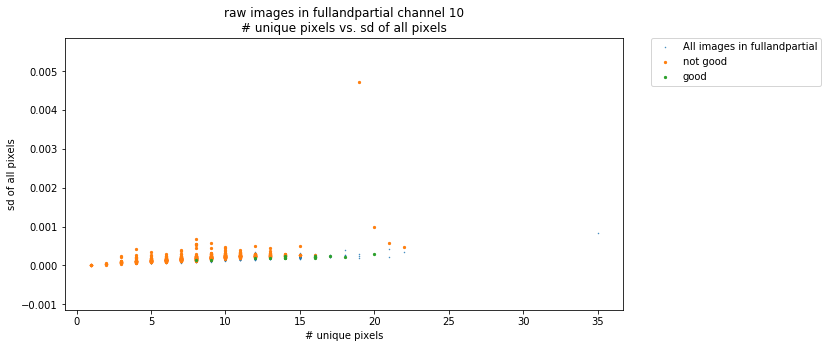

----------------------------------------------
channel 11:


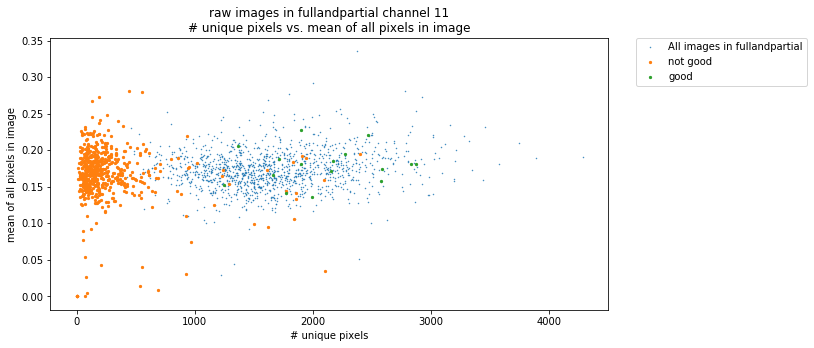

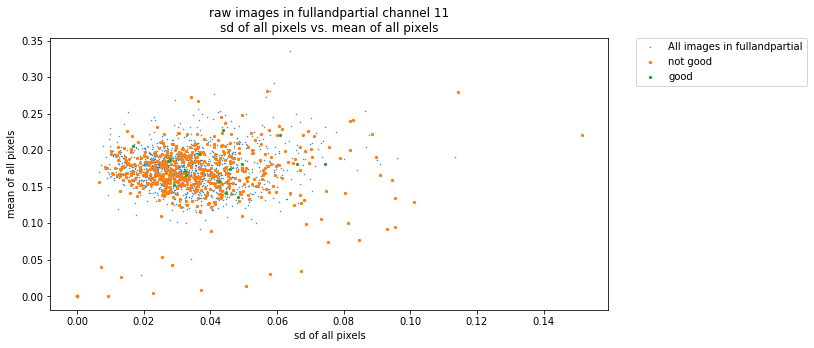

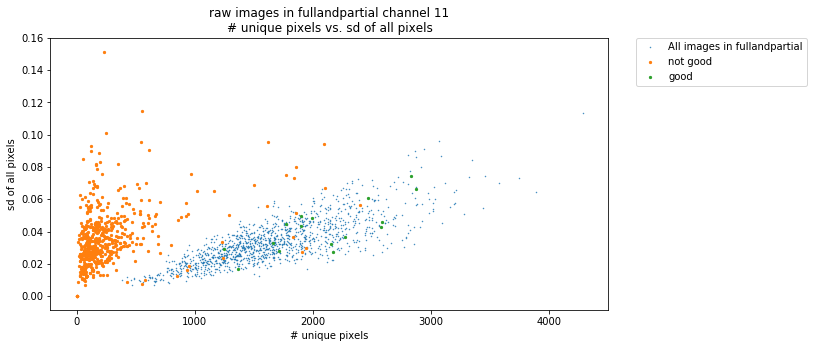

----------------------------------------------
channel 12:


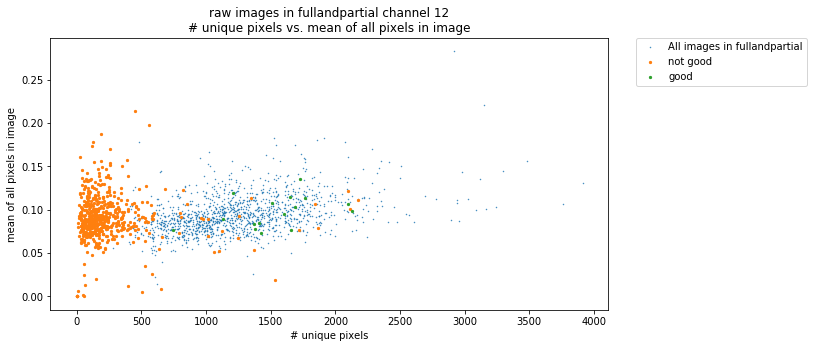

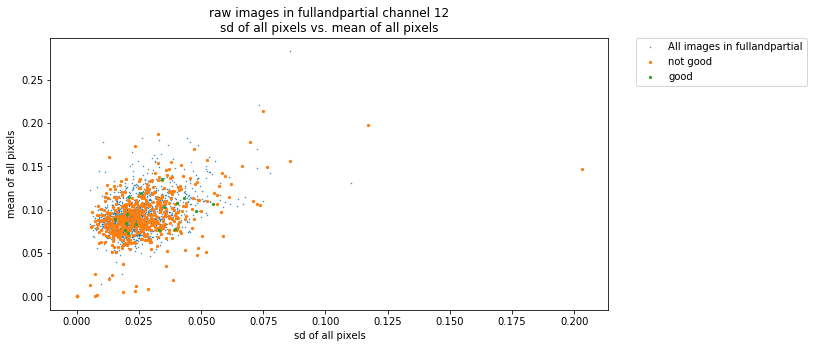

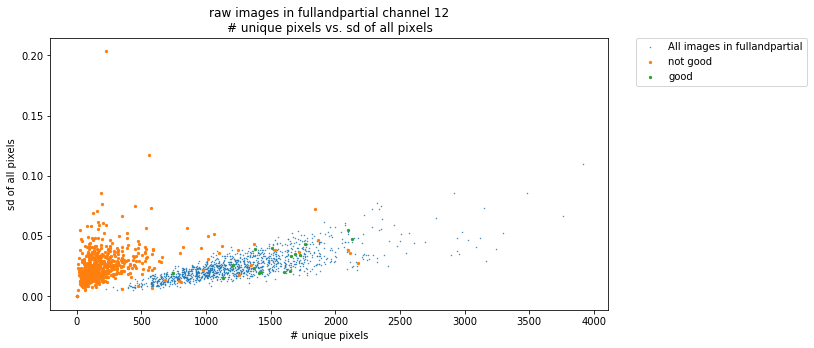

----------------------------------------------
channel 13:


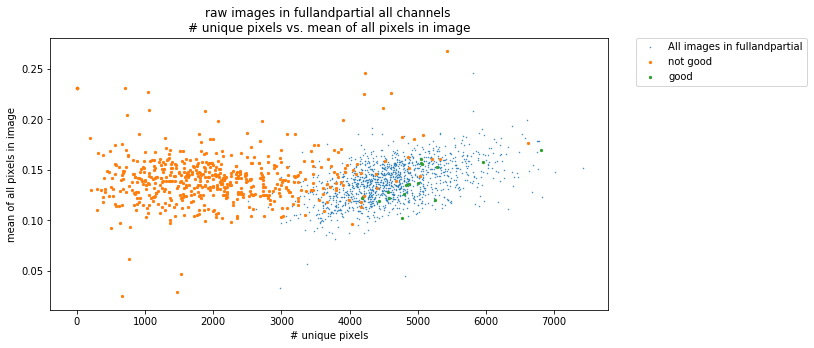

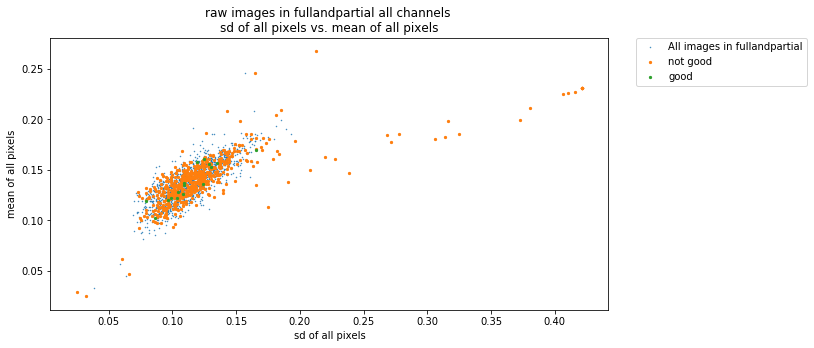

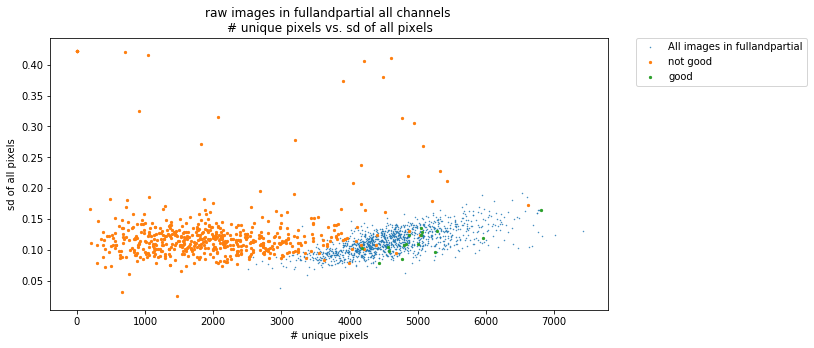

In [50]:
# plot raw distributions

un_pix_raw = np.array(un_pix_raw)
m_pix_raw = np.array(m_pix_raw)
sd_pix_raw = np.array(sd_pix_raw)

n_ch = un_pix_raw.shape[-1]

xlabels = ['# unique pixels', 'sd of all pixels', '# unique pixels']
ylabels = ['mean of all pixels in image', 'mean of all pixels', 'sd of all pixels']
subtitles = [
    xlabels[0] + ' vs. ' + ylabels[0],
    xlabels[1] + ' vs. ' + ylabels[1],
    xlabels[2] + ' vs. ' + ylabels[2]
]

for k in range(n_ch):
    print('----------------------------------------------')
    print(f'channel {k}:')
    
    pix_values_raw_ch_k = [[un_pix_raw[:, k], m_pix_raw[:, k]],
                           [sd_pix_raw[:, k], m_pix_raw[:, k]],
                           [un_pix_raw[:, k], sd_pix_raw[:, k]]
                     ]
    
    for j in range(3):
#         print(f'\t plot: {subtitles[j]}')
        plt.figure(figsize=(10,5))
        plt.scatter(pix_values_raw_ch_k[j][0],pix_values_raw_ch_k[j][1], s=0.2, label=f'All images in {path}')
        plt.scatter([pix_values_raw_ch_k[j][0][i] for i in not_good_i],[pix_values_raw_ch_k[j][1][i] for i in not_good_i], s=5, label='not good')
        plt.scatter([pix_values_raw_ch_k[j][0][i] for i in good_i],[pix_values_raw_ch_k[j][1][i] for i in good_i], s=5, label='good')
        plt.xlabel(xlabels[j])
        plt.ylabel(ylabels[j])
        if k < 13:
            plt.title(f'raw images in {path} channel {k}\n' + subtitles[j])
        else:
            plt.title(f'raw images in {path} all channels \n' + subtitles[j])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        if k < 13:
            plt.savefig(path + '_raw_ch' + str(k) + subtitles[j] + '.png', bbox_inches='tight', dpi=300)
        else:
            plt.savefig(path + '_raw_all_channels' + subtitles[j] + '.png', bbox_inches='tight', dpi=300)
        plt.show()
        plt.close('all');
        
        

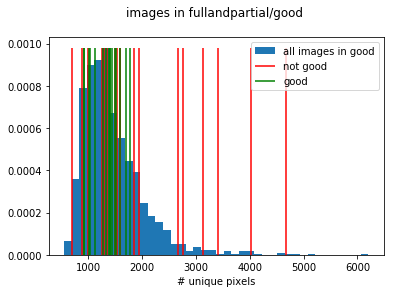

In [9]:
hist = plt.hist(un_pix, bins=40, density=True, label='all images in good');
plt.vlines([un_pix[i] for i in not_good_i], 0, hist[0].max(), label='not good', colors='r')
plt.vlines([un_pix[i] for i in good_i], 0, hist[0].max(), label='good', colors='g')
plt.xlabel('# unique pixels')
plt.title(f'images in {path} \n ')
plt.legend()

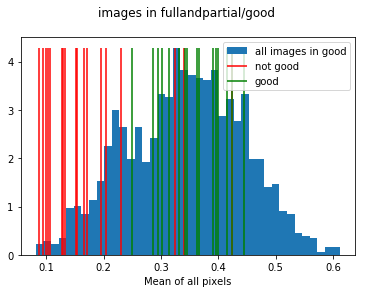

In [10]:
hist = plt.hist(m_pix, bins=40, density=True, label='all images in good');
plt.vlines([m_pix[i] for i in not_good_i], 0, hist[0].max(), label='not good', colors='r')
plt.vlines([m_pix[i] for i in good_i], 0, hist[0].max(), label='good', colors='g')
plt.xlabel('Mean of all pixels')
plt.title(f'images in {path} \n ')
plt.legend()

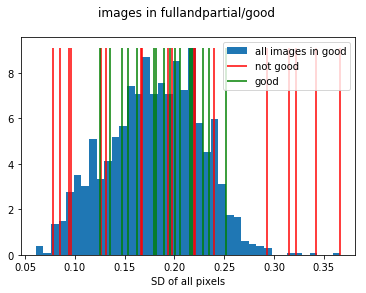

In [11]:
hist = plt.hist(sd_pix, bins=40, density=True, label='all images in good');
plt.vlines([sd_pix[i] for i in not_good_i], 0, hist[0].max(), label='not good', colors='r')
plt.vlines([sd_pix[i] for i in good_i], 0, hist[0].max(), label='good', colors='g')
plt.xlabel('SD of all pixels')
plt.title(f'images in {path} \n ')
plt.legend()